Jackson Boyle
 - Collaborator 1
 - Collaborator 2
 - etc

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 2 - Classification

Due Friday Mar 28, 2025 4p

Total pts: 30

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - *Do not rewrite code* if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

In this problem, you'll be comparing Logistic Regression, Decision Trees, and Random Forests in a task identifying mushrooms as edible or poisonous.
The data is imported below and the features and feature values are listed. Notice, they're all letters.

 - Split the data into targets and features
 - Decide which features are ordinal or categorical. Refer to the feature descriptions on the [UCI Machine Learning site](https://archive.ics.uci.edu/dataset/73/mushroom) (hint: at least 3 categories are ordinal and others are binary...so you'll use an ordinal encoder)
 - Encode the features
 - Train the three models. You will want to use ```LogisticRegressionCV``` and ```GridSearchCV``` to find the best version of each model.
 - Make predictions with your models.
 - Show the confusion matrices for each type of model evaluated on the same test set. Label each figure clearly as to which model it is.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer




In [9]:
mushrooms_df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/mushrooms.csv')

for k, col in enumerate(mushrooms_df.columns):
    print(f'{k:>3}. {col} - {mushrooms_df[col].unique()}')

  0. type - ['p' 'e']
  1. cap_shape - ['x' 'b' 's' 'f' 'k' 'c']
  2. cap_surface - ['s' 'y' 'f' 'g']
  3. cap_color - ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
  4. bruises - ['t' 'f']
  5. odor - ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
  6. gill_attachment - ['f' 'a']
  7. gill_spacing - ['c' 'w']
  8. gill_size - ['n' 'b']
  9. gill_color - ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
 10. stalk_shape - ['e' 't']
 11. stalk_root - ['e' 'c' 'b' 'r' '?']
 12. stalk_surface_above_ring - ['s' 'f' 'k' 'y']
 13. stalk_surface_below_ring - ['s' 'f' 'y' 'k']
 14. stalk_color_above_ring - ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
 15. stalk_color_below_ring - ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
 16. veil_type - ['p']
 17. veil_color - ['w' 'n' 'o' 'y']
 18. ring_number - ['o' 't' 'n']
 19. ring_type - ['p' 'e' 'l' 'f' 'n']
 20. spore_print_color - ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
 21. population - ['s' 'n' 'a' 'v' 'y' 'c']
 22. habitat - ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [10]:
print(list(mushrooms_df.columns))


['type', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat']


In [ ]:
'''your code here. add cells as needed'''
# gill spacing, ring number, population, and gill size are ordinal 


In [15]:
# identify and encode features and target
y = mushrooms_df['type']
X = mushrooms_df.drop(columns = 'type')

ord_features = ['gill_spacing', 'ring_number', 'population', 'gill_size']
ordEnc = OrdinalEncoder 

cat_features = [col for col in X.columns if col not in ord_features]
hotEnc = OneHotEncoder 

ct = ColumnTransformer([
    ('hot', OneHotEncoder(), cat_features),
    ('ord', OrdinalEncoder(), ord_features),
],
    remainder='passthrough',
    verbose_feature_names_out=False
)

X_trans = ct.fit_transform(X)
feature_nams = ct.get_feature_names_out()

labEnc = LabelEncoder()

y_trans = labEnc.fit_transform(y)
label_names = labEnc.classes_




In [ ]:
# Make / run logistic regression


X_train, X_test, y_train, y_test = train_test_split(X_trans, y_trans, test_size=0.2, random_state=42)

model_LogReg = LogisticRegressionCV(max_iter=1000)
model_LogReg.fit(X_train, y_train)

y_pred_train = model_LogReg.predict(X_train)
y_pred = model_LogReg.predict(X_test)

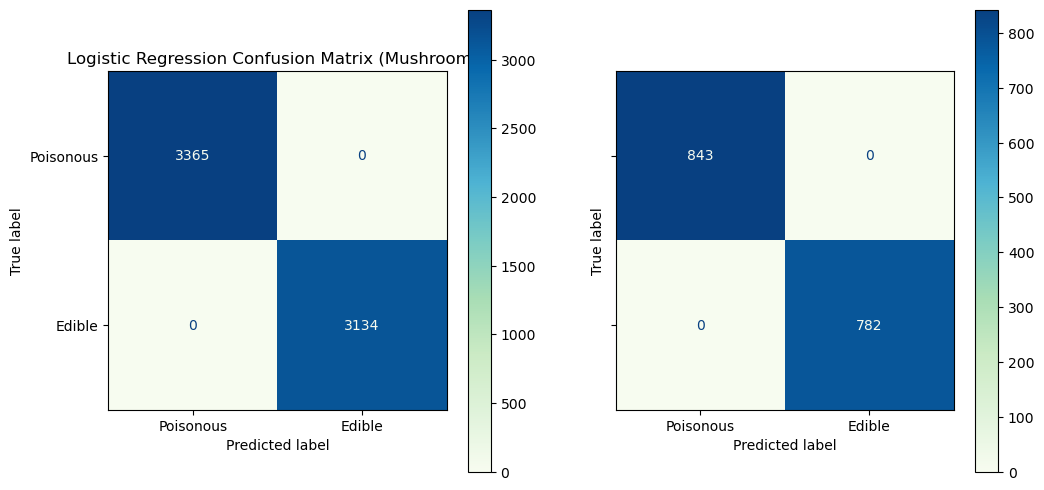

In [30]:
fig, ax = plt.subplots(1,2, figsize = (12,6), sharey=True)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train, 
                                        display_labels = ['Poisonous', 'Edible'],
                                        cmap = 'GnBu',
                                        ax = ax[0])
ax[0].set_title("Logistic Regression Confusion Matrix (Mushrooms)")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels = ['Poisonous', 'Edible'],
                                        cmap = 'GnBu',
                                        ax = ax[1])
plt.show()

In [33]:
tree_params = {'max_depth':[2, 4, 6],
               'min_samples_split': [5, 10, 20]}

tree_clf = DecisionTreeClassifier()

grid_search = GridSearchCV(tree_clf, 
                   param_grid = tree_params, 
                   cv = 5)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6],
                         'min_samples_split': [5, 10, 20]})

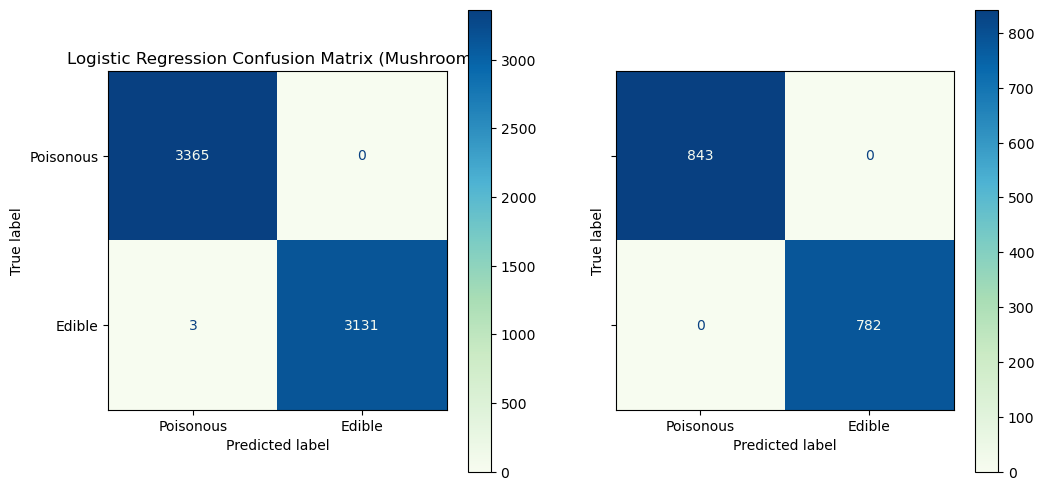

In [36]:
tree_clf = grid_search.best_estimator_
grid_search.best_params_
y_pred = tree_clf.predict(X_test)
y_pred_train = tree_clf.predict(X_train)
fig, ax = plt.subplots(1,2, figsize = (12,6), sharey=True)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train, 
                                        display_labels = ['Poisonous', 'Edible'],
                                        cmap = 'GnBu',
                                        ax = ax[0])
ax[0].set_title("Decision Tree Confusion Matrix (Mushrooms)")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels = ['Poisonous', 'Edible'],
                                        cmap = 'GnBu',
                                        ax = ax[1])
plt.show()

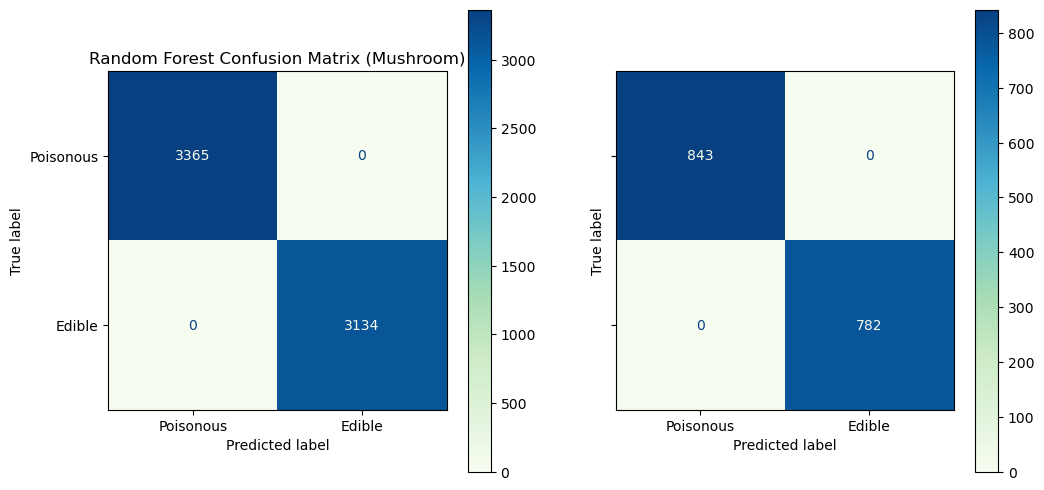

In [39]:
# random forest model code
from sklearn.ensemble import RandomForestClassifier

rf_params = {'n_estimators': [50, 100, 200],
             'max_depth': [4, 6, 8],
             'min_samples_split': [2, 5, 10]}

rf_clf = RandomForestClassifier(random_state=42)

rf_grid_search = GridSearchCV(rf_clf, param_grid=rf_params, cv=5)
rf_grid_search.fit(X_train, y_train)

rf_best_clf = rf_grid_search.best_estimator_
rf_best_params = rf_grid_search.best_params_

y_pred_train_rf = rf_best_clf.predict(X_train)
y_pred_rf = rf_best_clf.predict(X_test)

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train_rf,
                                        display_labels=['Poisonous', 'Edible'],
                                        cmap='GnBu',
                                        ax=ax[0])
ax[0].set_title("Random Forest Confusion Matrix (Mushroom)")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf,
                                        display_labels=['Poisonous', 'Edible'],
                                        cmap='GnBu',
                                        ax=ax[1])
plt.show()

### Problem 1 questions

 - Which model was best?
 - What were the hyper-parameters of this model.
 - What were the accuracy, recall, and precision of the model.
 - Of accuracy, recall, precision, which did you use to decide the best model.

#### Your responses here:

- Which model: Both the Logistic Regression and Random Forest models were perfect
- Hyper-parameters: For the random forest model: {'n_estimators': [50, 100, 200],
             'max_depth': [4, 6, 8],
             'min_samples_split': [2, 5, 10]}
- Metrics
    - Accuracy: 100%
    - Recall: 100%
    - Precision: 100%
- How did you decide best? At least the way I coded this, the random forest and logistic regression were both perfect so it was easy to decide that those were better than the decision tree. If it was close, though, I think precision would be the top priority to make sure no poisonous mushrooms are eaten.

## Problem 2

The NFL draft is coming up at the end of April. This is when NFL teams get to select college players to join their team. The draft comprises seven rounds over three days (day 1: round 1, day 2: rounds 2 and 3, day 3: rounds 4, 5, 6, 7) with teams taking turns selecting players. Better players tend to go in earlier rounds.

In this problem, you will try to predict whether defensive players are drafted on Day 1, 2, or 3 based on their performance in the NFL combine (an assay of physical skills).

The data are imported below.

 - Create a target variable for day 1, day 2, day 3 based on the round drafted.
 - Create the most accurate predictor you can using any method or subset of the data you choose. *You may not use round as a feature!*
 - Show the confusion matrix for your model and list the accuracy of your model.

In [3]:
nfl_draft = pd.read_csv('https://raw.githubusercontent.com/eatai/datasets/refs/heads/main/nfl_defensive_draft.csv')

In [4]:
print(list(nfl_draft.columns))
for k, col in enumerate(nfl_draft.columns):
    print(f'{k:>3}. {col} - {nfl_draft[col].unique()}')


['Unnamed: 0', 'round', 'season', 'name', 'age', 'position', 'college_conference', 'height', 'weight', 'forty', 'vertical', 'broad_jump', 'cone', 'shuttle']
  0. Unnamed: 0 - [   0    1    2 ... 2798 2799 2800]
  1. round - [1 2 3 4 5 6 7]
  2. season - [2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2022 2021 2020 2019 2018 2017 2023 2024]
  3. name - ['Dewayne Robertson' 'Terence Newman' 'Johnathan Sullivan' ...
 'Jaylen Harrell' 'Kalen King' 'Jaylen Key']
  4. age - [21. 25. 22. 23. 20. 24. nan 26.]
  5. position - ['DL' 'DB' 'LB']
  6. college_conference - [nan 'Big Twelve Conference' 'Pacific Ten Conference'
 'Mid-Eastern Athletic Conference' 'Atlantic Coast Conference'
 'Southeastern Conference' 'Big Sky Conference' 'Big East'
 'Sun Belt Conference' 'Big Ten Conference' 'Independent'
 'Pacific Twelve Conference' 'Ivy League' 'Colonial Athletic Association'
 'Ohio Valley Conference' 'Mid-American Conference'
 'Western Athletic Conference' 'Conference USA' '

In [ ]:
y = nfl_draft['round'].apply(lambda r: 1 if r == 1 else (2 if r in [2, 3] else 3)) # used AI to help fix my first attempt at splitting into days
X = nfl_draft.drop(columns=['round', 'name', 'season']) # didn't think name or season would be helpful in predicting draft round


cat_features = ['position', 'college_conference']
labEnc = LabelEncoder()

numeric_features = [col for col in X.columns if col not in cat_features]
ss = StandardScaler()


ct = ColumnTransformer([('cat', OneHotEncoder(), cat_features),
                        ('scale', ss, numeric_features)
                        ],
                       remainder='passthrough',
                       verbose_feature_names_out=False)

features_trans = ct.fit_transform(X)
X_trans = ct.fit_transform(X)
feature_names = ct.get_feature_names_out()

labEnc = LabelEncoder()

y_trans = labEnc.fit_transform(y)
label_names = labEnc.classes_

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_trans, y_trans, test_size=0.2, random_state=42)

model_LogReg = LogisticRegressionCV(max_iter=1000)

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

X_test = X_test.toarray()
X_test = X_test[~np.isnan(X_test).any(axis=1)]
y_test = y_test[:X_test.shape[0]]  # used AI to help figure out how to do this

model_LogReg.fit(X_train, y_train)

y_pred_train = model_LogReg.predict(X_train)
y_pred = model_LogReg.predict(X_test)

In [17]:
rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [4, 6, 8],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

rf_clf = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(rf_clf, param_grid=rf_params, cv=5)
rf_grid_search.fit(X_train, y_train)

rf_best_clf = rf_grid_search.best_estimator_
train_accuracy = rf_best_clf.score(X_train, y_train)
test_accuracy = rf_best_clf.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")


Training Accuracy: 0.67
Test Accuracy: 0.54


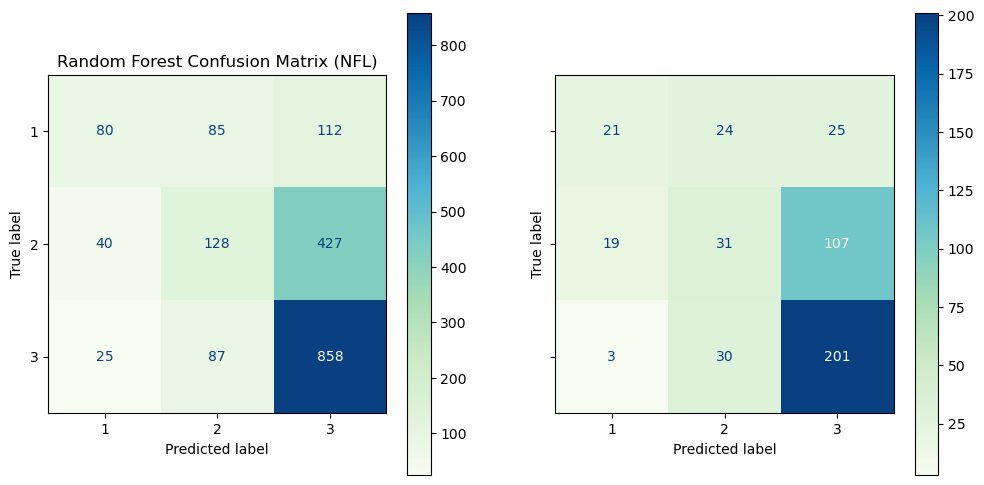

In [18]:
fig, ax = plt.subplots(1,2, figsize = (12,6), sharey=True)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train, 
                                        display_labels=label_names,
                                        cmap='GnBu',
                                        ax=ax[0])
ax[0].set_title("Random Forest Confusion Matrix (NFL)")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels=label_names,
                                        cmap='GnBu',
                                        ax=ax[1])
plt.show()

### Problem 2 Questions

 - Which kind of model did you use and why did you choose it? I chose a logistic regression at first because it worked well for the mushrooms and I though that with the number of numeric values it might work better than a random forest. But after trying a random forest, I was able to get a slightly better accuracy so chose to stick with that. 
 - What was your accuracy? 
Training Accuracy: 0.67
Test Accuracy: 0.54